In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from preprocess import *

def plot_event(dataset, idx):
    (zx, zy), targets = dataset[idx]

    zx = zx.squeeze(0).numpy()
    zy = zy.squeeze(0).numpy()

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    im0 = ax[0].imshow(
        zx,
        origin="lower",
        aspect="auto",
    )
    ax[0].set_title("ZX projection")
    ax[0].set_xlabel("X bin")
    ax[0].set_ylabel("Z bin")
    plt.colorbar(im0, ax=ax[0])

    im1 = ax[1].imshow(
        zy,
        origin="lower",
        aspect="auto",
    )
    ax[1].set_title("ZY projection")
    ax[1].set_xlabel("Y bin")
    ax[1].set_ylabel("Z bin")
    plt.colorbar(im1, ax=ax[1])

    E = 10**targets["E_nu"]
    ELep = 10**targets["E_lep"]
    vx, vy, vz = targets["vx"], targets["vy"], targets["vz"]

    fig.suptitle(
        f"Event {idx} | Eν = {E:.2f} GeV | "
        f"Event {idx} | ELep = {ELep:.2f} GeV | "
        f"vtx=({vx:.1f}, {vy:.1f}, {vz:.1f})"
    )

    plt.tight_layout()
    plt.show()


In [2]:
dataset = torch.load("10000_000.pt", map_location="cpu", weights_only=False)
print(len(dataset))


1000


In [3]:
(zx, zy), targets = dataset[0]

print("ZX shape:", zx.shape)  # (1, Z, X)
print("ZY shape:", zy.shape)  # (1, Z, Y)
print("Targets:", targets)


ZX shape: torch.Size([1, 100, 2048])
ZY shape: torch.Size([1, 100, 2048])
Targets: {'E_nu': 2.843419665204918, 'weight': 0.449236298292902, 'vx': -121.72957984768132, 'vy': 1.7455620504840823, 'vz': 42.52655115542968, 'E_lep': 5.6153646, 'Eta_lep': 5.1874843}


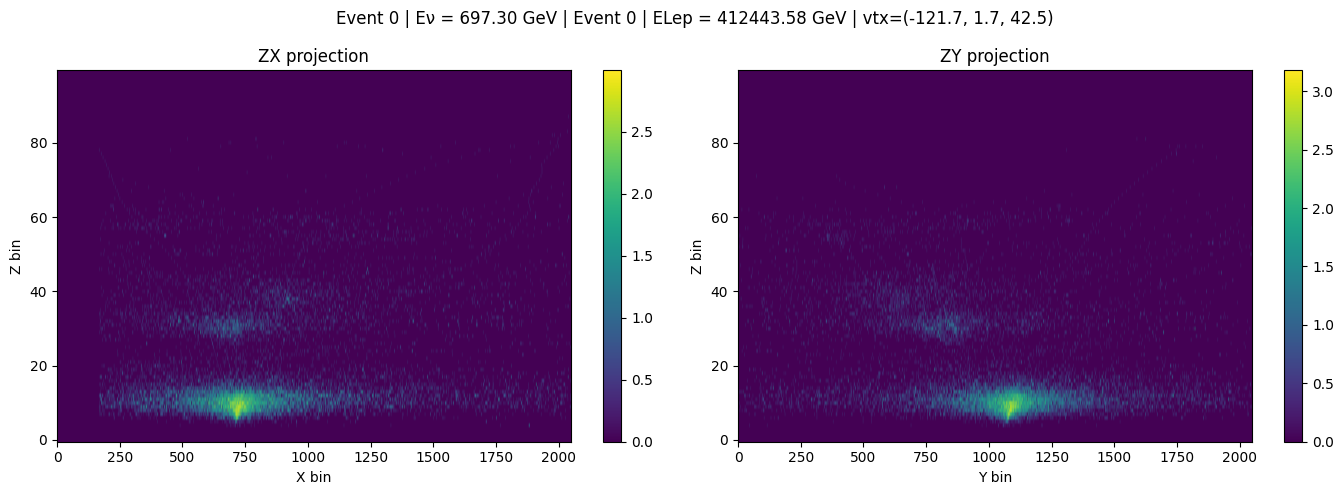

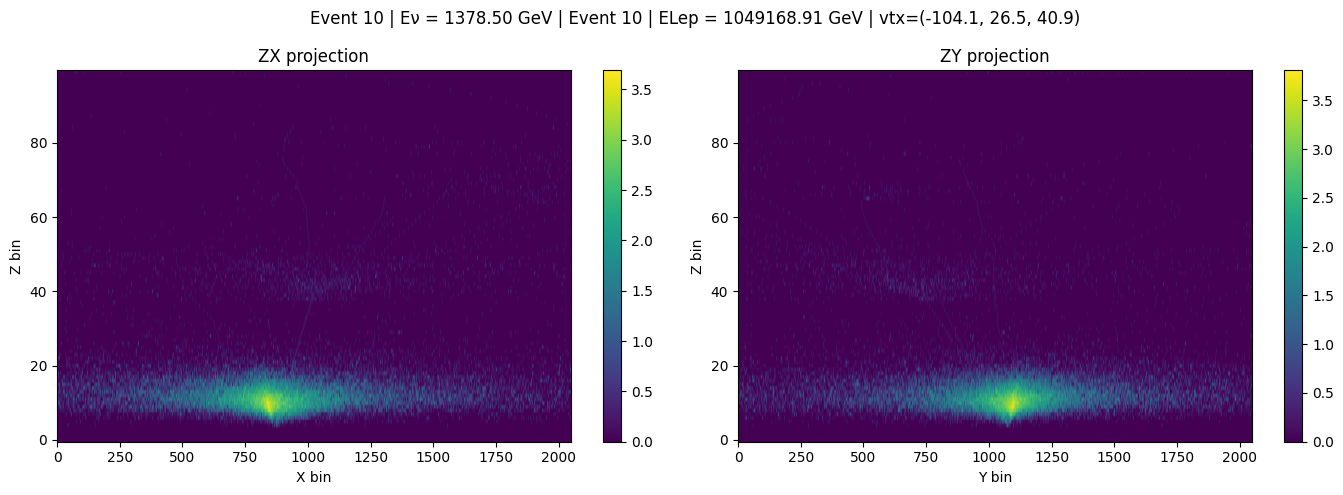

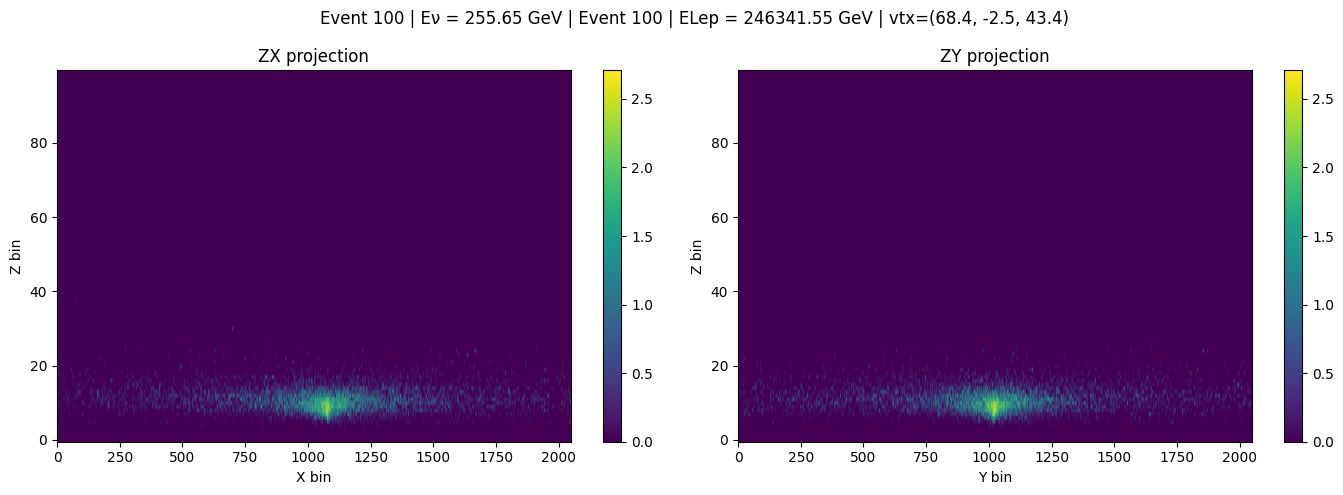

In [4]:
plot_event(dataset, idx=0)
plot_event(dataset, idx=10)
plot_event(dataset, idx=100)
